 # <center>Final Exam &ndash; DATA 3401 (Spring 2023)</center>

## Start Date: 5/5
## Due Date: 5/8 (at 11:59pm) &ndash; this is a hard deadline so don't miss it!
### Data 3401; class #26258 
### Aaron Alexaner Gluch
### 1001806336 / aag6336

## Final Rules
This final exam is simliar to the midterm exam. Please work the exercises below **on your own**.  When you have completed the exam, you should push your completed jupyter notebook to your GitHub repo for this class in the **Exams->Final** folder.

You may not discuss the problems with **anyone else**, including persons on an online internet forum. Consulting an outside source like this will be considered an academic integrity violation. **Any questions should be referred to me.**

You may use all class resources including previous labs and lectures, and anything posted on the course website or Teams.

You may not use any function that trivializes a problem. For example, if I ask you to write a `max` function that computes the maximum entry in a list, you are not allowed to use the pre-defined Python function `max`; you must write your own.



## Exercise 1 (25 points)
In this exercise you will be working with the files abalone.names and abalone.data in the Final Exam folder.

1. Open the abalone.names file in your notebook. Using the information there, in a new cell briefly describe the data set and relevant features.
1. Load the abalone.data file into a dataframe using pandas. Print the .head() of the dataframe
1. Using the .names file, **add** a header line to your dataframe describing each column of data
1. Take the last column and make a new dataframe called `labels`
    1. Print out the value counts of each label.
    1. What do you notice about the distribution of the labels?
    1. Based on your observations, propose a way to modify the labels to consolidate some of the classes, and do this modification (you should describe in comments in your code what change you are making)
    1. After making your modification, show the value counts of the new labels again
1. Make a scatterplot of each feature against the others (it should be a single plot)
    1. Describe any trends or correlations that you see.


   0      1      2      3       4       5       6      7   8
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64


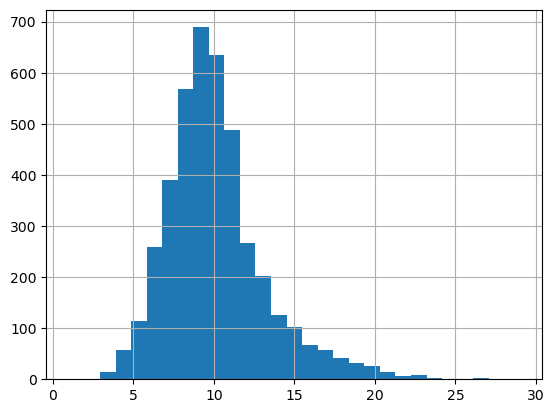

C:\Users\alexg\AppData\Local\Temp\ipykernel_11124\1239694331.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[i] = labelDict[labels[i]]


0    839
4    754
5    693
2    689
3    634
1    568
Name: Rings, dtype: int64


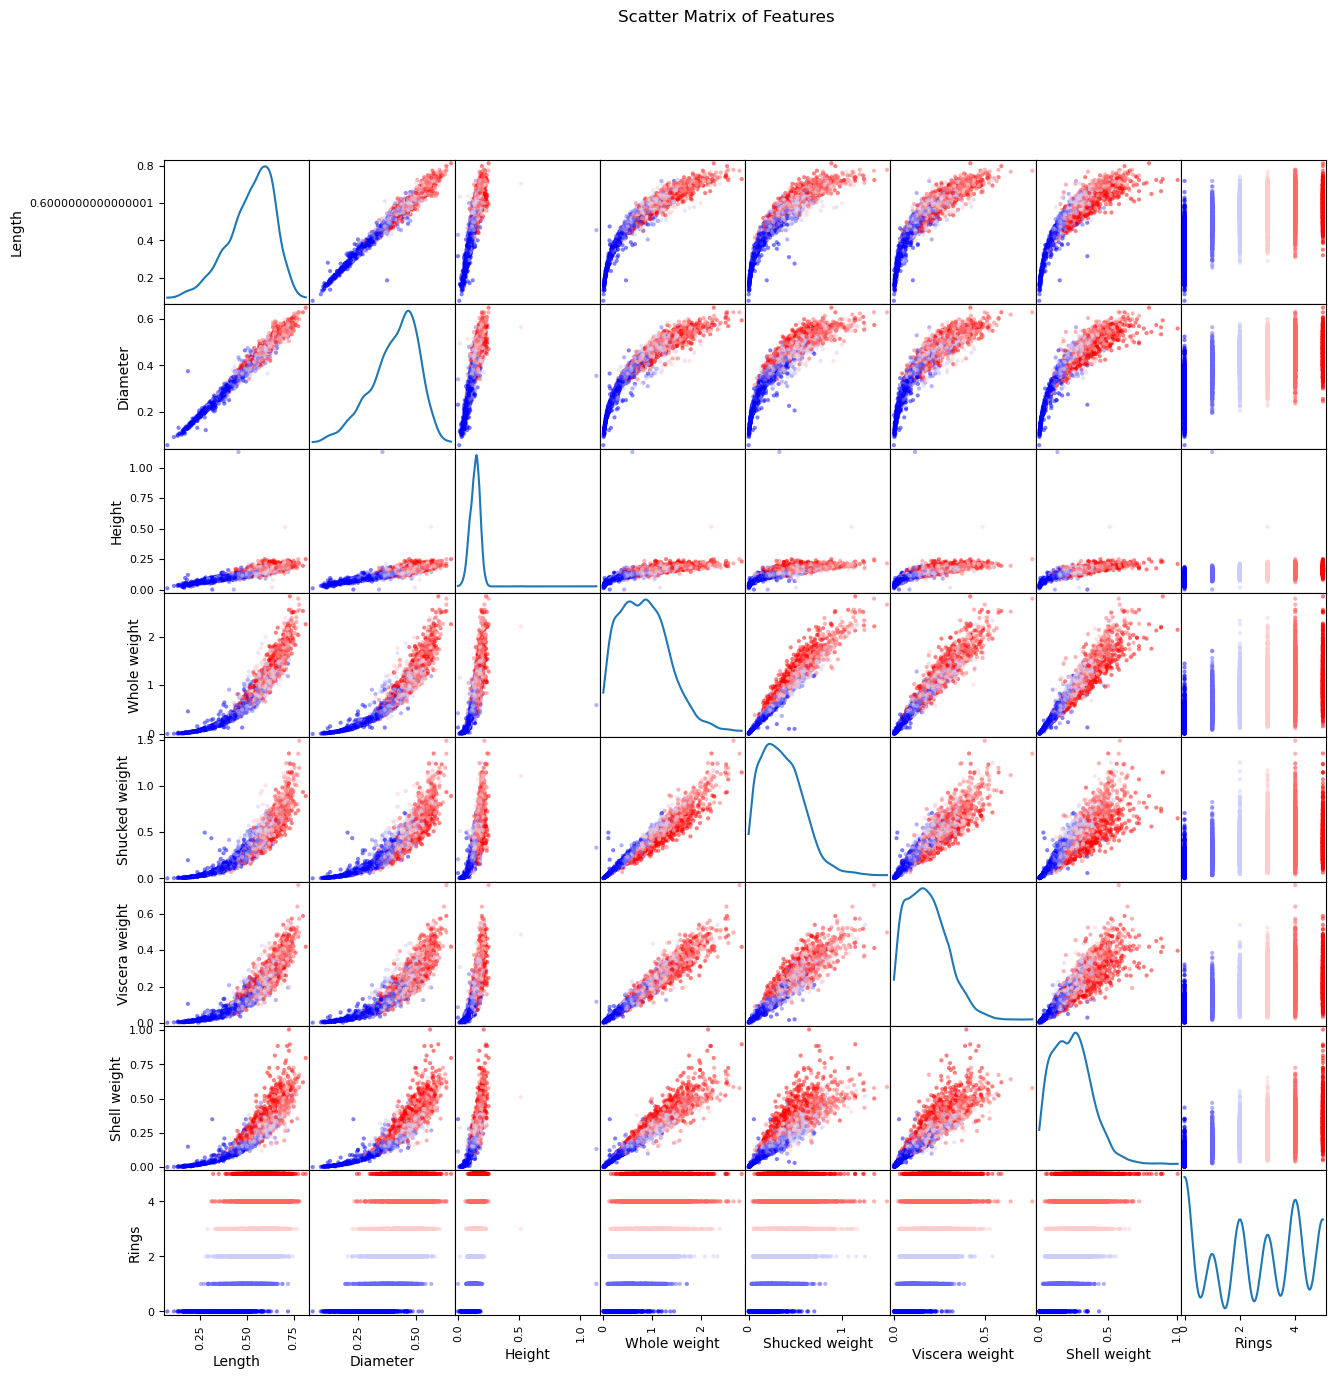

In [67]:
## Write your code here
#1:
#with open("abalone.names", "r") as f:
#    print(f.read())
#
#2:
import pandas as pd
df = pd.read_csv('abalone.data', header=None)
print(df.head())
#3:
header = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df.columns = header
#4:
labels = df['Rings']
#4.A:
print(labels.value_counts())
import matplotlib.pyplot as plt
labels.hist(bins=29)
plt.show()
#4.B:
#The value counts are not uniform, but are rather a gaussian with right skew. 
#4.C:
#I would've liked to have left it unmodified, but given the need to change it, I've chosen to make it approximately
#uniform via the following procedure: Add the value counts of ring classes 1, 2, 3, etc until the addition of the nth
#class brings the total higher than 689 (the highest value count of any individual class) or greater; from there, classes
#1,2,3,...,n-1 are lumped together into the same label, and class n is added as well if doing so brings the total closer
#to 689, then repeat with the next n unassigned ring classes.. The result is that classes 1-7 become label 1, 
#classes 8-10 become labels 2-4, classes 11 & 12 become label 5, classes 13-25 bcome label 6, and classes 26-29 became
#label 7. However, I made an exception and lumped labels 6 & 7 together because the value count of label 7 was
#sufficiently miniscule that lumping 6 & 7 produced a label 6 whose value count was at least half as close to 689 as was 
#the label (1) with the highest value count (839). To implement the changes, I used the following code:

valueList = sorted(set(df['Rings'])) #In ascending order, create a list of all unique values that appear in df['Rings']
valueDict = {} #Create a dictionary which maps each unique value to the value count of that value:
for i in range(len(valueList)):
    valueDict[valueList[i]] = labels.value_counts()[valueList[i]]

labelDict = {} #Create a new dictionary which aims to map old label values to new label values:
v = 0
l = 0
m = 0
for i in range(len(valueList)): #Sets m to the individual ring value with the highest value count:
    if valueDict[valueList[i]] > m:
        m = valueDict[valueList[i]]
for i in range(len(valueList)): #Logic workhorse: Adds the counts of the smallest values from valueList to v until v stops 
    if abs((v + valueDict[valueList[i]]) - m) > abs(v - m): #growing (prior to which, values from valueList are assigned 
        l += 1                                              #new label values according to l), at which point v is set back 
        labelDict[valueList[i]] = l                         #to zero and l is incremented by 1 such that subsequent values 
        v = 0                                               #from valueList are no longer assigned to the prior label.
    else:
        labelDict[valueList[i]] = l
    v += valueDict[valueList[i]]
labelList = [] #In ascending order, fetches the list of new labels:
for i in range(len(valueList)):
    labelList += [labelDict[valueList[i]]]
labelList = sorted(set(labelList)) #finished fetching list of new labels.
l = 0 #Figures out which of the new labels has the highest value count and sets l to its value count:
v = 0
for i in range(len(labelList)):
    for j in range(len(valueList)):
        if labelDict[valueList[j]] == i:
            v += valueDict[valueList[j]]
    if abs(v - m) > abs(l - m):
        l = v
    v = 0
for i in range(len(valueList)): #Figures out the value count of the new label which appears last in labelList and sets
    if labelDict[valueList[i]] == max(labelList): #(continued) v to this value count.
        v += valueDict[valueList[i]]
if v < abs(l - m): #Unless v is large enough that adding its value count to the value count of the second to last label
    for i in range(len(valueList)): #in labellist, all old labels mapped to the last label in labelList are re-mapped to
        if labelDict[valueList[i]] == max(labelList): #the second to last label in labelList
            labelDict[valueList[i]] = labelList[-2]

for i in range(4177): #Change the values in labels according to the dictionary:
    labels[i] = labelDict[labels[i]]

df['Rings'] = labels  #Replace rings with the new values of labels:
labels2 = df['Rings'] #Create a second labels object just to test that the dataframe really changed:
#4.D:
print(labels2.value_counts())
#5:
from pandas.plotting import scatter_matrix
scatter_matrix(df, c=df['Rings'], figsize=(15,15), diagonal="kde", cmap="bwr")
plt.suptitle("Scatter Matrix of Features")
plt.show()
#Ring count seems to increase with length, diameter, height, whole weight, shucked weight, viscera weight, and shell
#weight; consequently, all variables increase with each other, although slopes differ and some are linear and some are
#non-linear, and slopes differ in whether they curve upwards or downwards.


## Exercise 2: (20 points)


Consider that a person is standing on the real line at a given point $x_0$. The person then goes on a "random walk", meaning that they first take a step of size 1 in a random direction (so after this step they are either standing at $x_0+1$ or $x_0-1$), then they take another step of size 1 in a random direction (after the second step they are standing at one of $x_0-2,  x_0, $ or  $x_0+2$), and they continue this process for $n$ steps. At each stage, the person flips a fair coin to decide which direction to go in.
1. Write a function `RandomWalk(num_steps,start_position)`, that takes the number of steps `num_steps` for a random walk and the `start_position` of the random walk on the real line (so a float), and returns the location of the final step of the random walker.
2. Write another function `SimulateRandomWalk(num_sims,num_steps,start_position)` that simulates num_sims number of random walks, each of which contains `num_steps` steps and starts at `start_position`. Then, this function calls `RandomWalk()` repeatedly for `num_sims` times and finally returns a vector of size `num_sim` containing the final locations of all of the `num_sims` simulated random-walks.
3. Now write a script that plots the output of `SimulateRandomWalk(num_sims = 10000, num_steps = 100, start_position = 0)` in a histogram
4. Repeat step 3 for `num_steps` = 1000, 5000


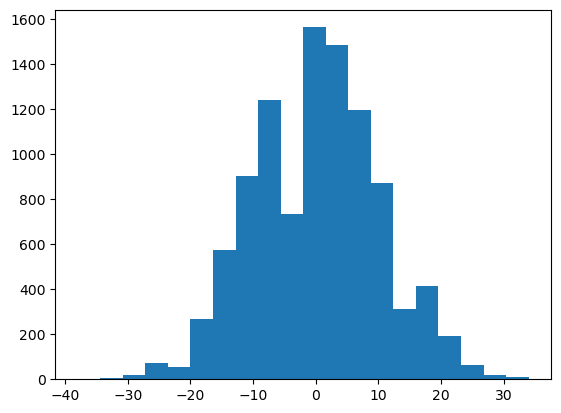

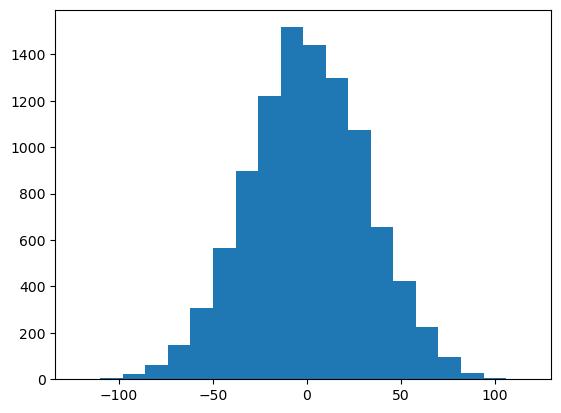

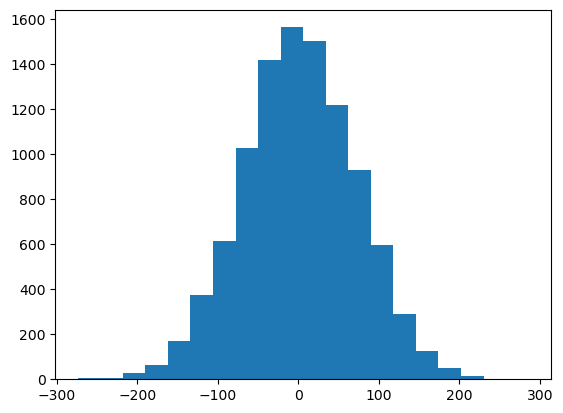

In [15]:
## Write your code here
import random
import matplotlib.pyplot as plt

#1
def RandomWalk(num_steps, start_position):
    position = start_position
    for i in range(num_steps):
        coin = random.choice([1, 0])
        position -= 1
        if coin == 1:
            position += 2
    return position

#2
def SimulateRandomWalk(num_sims, num_steps, start_position):
    walks = []
    for i in range(num_sims):
        walk = RandomWalk(num_steps, start_position)
        walks.append(walk)
    return walks

#3
sim = SimulateRandomWalk(num_sims = 10000, num_steps = 100, start_position = 0)
plt.hist(final_positions_100, bins = 20)
plt.show()

#4
sim1k = SimulateRandomWalk(num_sims = 10000, num_steps = 1000, start_position = 0)
plt.hist(sim1k, bins = 20)
plt.show()

sim5k = SimulateRandomWalk(num_sims = 10000, num_steps = 5000, start_position = 0)
plt.hist(sim5k, bins = 20)
plt.show()

## Exercise 4: (15 Points)

Consider the problem of projectile motion that we solved in class and we calculated the **height** of the motion (or in the Y-direction). Here is the class we defined for the projectile, (**Note** I renamed the **getHieght** method (function) to **getLocY**, which is a *method* (a function) to calculate the Y-component of the location):

In [16]:
class ProjLocY():  
    def __init__(self, velInitY, g = 9.8):  
        self.velInitY = velInitY # initial velocity along the y direction.  
        self.gravityConstant = g # gravityConstant, 9.81 on earth.  
    def getLocY(self, time):  
        """  
        Return the location of the projectile at the specific given `time` and initial velocity.  
        Input  
            time    :   An input real (float) representing the time  
                        past since the start of the projectile motion.  
        """  
        return self.velInitY * time - 0.5 * self.gravityConstant * time**2  
    
    def evaluate(self, time): 
        return self.getLocY(time)  

1. Now, define a similar class for projectile motion in the x direction.
(Note: Recall the projectile motion along the x direction does not involve acceleration.)

1. Define a subclass that inherits the properties of the projectiles in x and y directions from the corresponding super (parent) classes (```ProjLocX``` and ```ProjLocY```).

1. In addition to the inherited methods (functions), this new subclass must contain a ```evaluate(self, time)``` method which computes and returns the location (x,y) of the projectile by calling and aggregating information from the corresponding methods of the parent classes ```getLocX(time)``` and ```getLocY(time)```.

1. Compute and return the location of the projectile in X-Y plane for initial velocities (10, 10) meters / sec at time 1 sec since the start of the projectile.


In [17]:
# Write your code here
#1
class ProjLocX():
    def __init__(self, velInitX):
        self.velInitX = velInitX

    def getLocX(self, time):
        """
        Return the location of the projectile at the specific given `time` and initial velocity.
        Input
            time    :   An input real (float) representing the time
                        past since the start of the projectile motion.
        """
        return self.velInitX * time

#2
class ProjLocXY(ProjLocX, ProjLocY):
    def __init__(self, velInitX, velInitY, g = 9.8):
        ProjLocX.__init__(self, velInitX)
        ProjLocY.__init__(self, velInitY, g)

#3
    def evaluate(self, time):
        return (self.getLocX(time), self.getLocY(time))

#4
proj = ProjLocXY(10, 10)
loc = proj.evaluate(1)
print(loc)

(10, 5.1)


## Bonus Exercise: (30 points)
If you invest a principal value of $P$ at time 0, and interest is continuously compounded at a rate $r$ (between 0 and 1), then the amount of money you would have after $t$ years is
$$M(t) = Pe^{rt}.$$
Fry has \\$0.01 in his bank account, but is accidentally transported 1,000 years into the future. He returns to his bank (which luckily still exists) to see how much money he now has. Assume Fry's account earns continuously compounded interest at a rate of 5\% (or $r=0.05$).
1. Create a numpy array of time from 0 to 1,000 years increasing by 1 year
1. Create a new numpy array that calculates how much money Fry's account has at each year
1. Plot Fry's money over the given timeframe


Now if Fry only earned simple interest, the amount of money he would have after $t$ years would be
$$ S(t) = P(1+rt).$$

1. Perform the same procedure as steps 1-3 above assuming Fry earns 5\% simple interest.
1. To illustrate the difference, also plot $M(t)-S(t)$ over the timeframe.
1. What do you conclude?

*Aside:* This problem, while silly, should teach you an important lesson: invest your money as early as you possibly can!

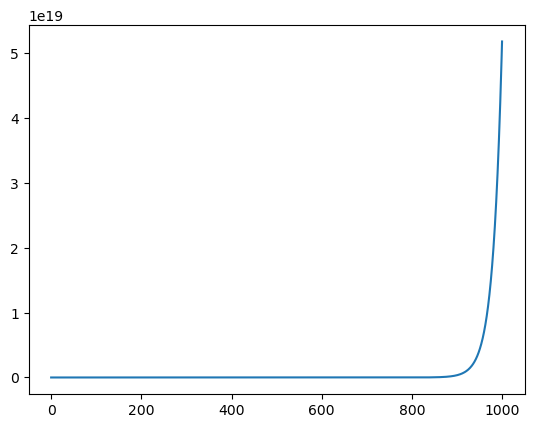

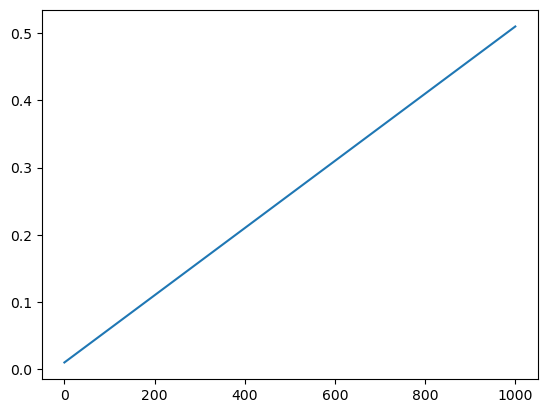

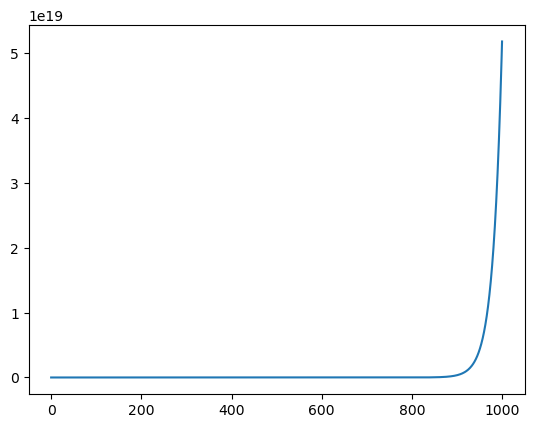

In [49]:
## Write your code here
import math
import numpy as np
import matplotlib.pyplot as plt

principal = 0.01
rate = 0.05

#A: Compound Interest:

#1
time = np.arange(0, 1001)
#2
moneyC = principal * (math.e **(time * rate))
#3
plt.plot(time, moneyC)
plt.show()

#B: Simple Interest:

#1
time = np.arange(0, 1001)
#2
moneyS = principal * (1 + (rate * time))
#3
plt.plot(time, moneyS)
plt.show()

#C: Difference:
D = moneyC - moneyS
plt.plot(time, moneyC - moneyS)
plt.show()

#D: Conclusion:
#An investment with simple interest can't make meaningful gains without meaningful starting capital while compound
#interest can get away with a lot more.